<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/CIFAR-10-Classification-Model-Using-CNN/blob/main/CIFAR_10_Classification_Model_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

#The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

#Question 1: Load Cifar10 dataset and run the batch of 32 size through a Convolution layer (12 filters, 3 size, 1 stride).

In [ ]:
#Importing necessary librarys 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,  MaxPool2D
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#Loading the Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


#Checking the size of train and test samples

In [ ]:
print('Numbers of train samples',x_train.shape[0])
print('Numbers of test samples', x_test.shape[0])

Numbers of train samples 50000
Numbers of test samples 10000


#checking the shape of train and test set.

In [ ]:
print("x_train shape:" ,{x_train.shape})
print("y_train shape:", {y_train.shape})
print("x_test shape:", {x_test.shape})
print("y_test shape:", {y_test.shape})

x_train shape: {(50000, 32, 32, 3)}
y_train shape: {(50000, 1)}
x_test shape: {(10000, 32, 32, 3)}
y_test shape: {(10000, 1)}


#Checking the size of an image

In [ ]:
print('Size of Images is :',len(x_train[1]),"x",len(x_train[2]))

Size of Images is : 32 x 32


#In this dataset we have 10 classes, So first we need to labeled that classes with names

In [ ]:
names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

#Now checking the number of images in each class

In [ ]:
for i in range(10):
    print(f'Number of samples for {names[i]} class are : {np.count_nonzero(x_train[i]) + np.count_nonzero(x_test[i])}')

Number of samples for Airplane class are : 6137
Number of samples for Automobile class are : 6108
Number of samples for Bird class are : 6144
Number of samples for Cat class are : 6144
Number of samples for Deer class are : 6133
Number of samples for Dog class are : 6142
Number of samples for Frog class are : 6139
Number of samples for Horse class are : 6144
Number of samples for Ship class are : 6144
Number of samples for Truck class are : 6144


#Printing the images with its names

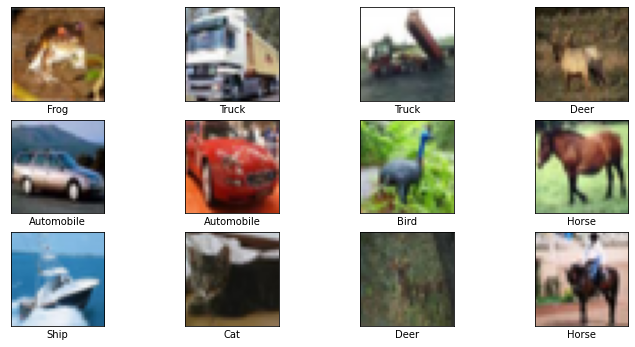

In [ ]:
plt.figure(figsize=(12,10))
for i in range(12):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(names[y_train[i][0]])

#Normalizing The Data


In [ ]:
# normalizing the data to help with the training
x_train=x_train/255
x_test=x_test/255

In [ ]:
# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

#Creating The CNN Model


In [ ]:
model = Sequential()

model.add(Conv2D(filters=12, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=12, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))


model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 12)        336       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 12)       48        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 12)        1308      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 12)       48        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 12)       0         
 2D)                                                             
                                                      

In [ ]:
METRICS = [
    'accuracy']
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

#Training The CNN Model

In [ ]:
history = model.fit(x_train, y_cat_train, batch_size=32, epochs=100,steps_per_epoch = x_train.shape[0] // 32,
                    validation_data=(x_test, y_cat_test))

Epoch 1/100
1562/1562 [==============================] - 9s 5ms/step - loss: 1.6425 - accuracy: 0.4081 - val_loss: 1.2828 - val_accuracy: 0.5496
Epoch 2/100
1562/1562 [==============================] - 8s 5ms/step - loss: 1.3278 - accuracy: 0.5211 - val_loss: 1.3369 - val_accuracy: 0.5274
Epoch 3/100
1562/1562 [==============================] - 9s 6ms/step - loss: 1.1989 - accuracy: 0.5700 - val_loss: 1.1101 - val_accuracy: 0.6058
Epoch 4/100
1562/1562 [==============================] - 8s 5ms/step - loss: 1.1181 - accuracy: 0.6030 - val_loss: 1.0370 - val_accuracy: 0.6419
Epoch 5/100
1562/1562 [==============================] - 8s 5ms/step - loss: 1.0600 - accuracy: 0.6241 - val_loss: 1.0172 - val_accuracy: 0.6427
Epoch 6/100
1562/1562 [==============================] - 8s 5ms/step - loss: 1.0116 - accuracy: 0.6415 - val_loss: 0.9872 - val_accuracy: 0.6534
Epoch 7/100
1562/1562 [==============================] - 8s 5ms/step - loss: 0.9679 - accuracy: 0.6566 - val_loss: 0.9559 - val_ac

In [ ]:
history = model.history.history
df=pd.DataFrame(model.history.history)

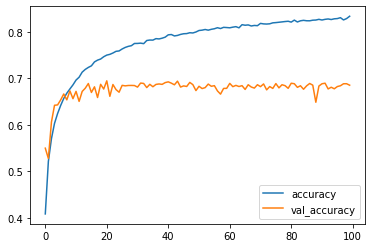

In [ ]:
df[['accuracy','val_accuracy']].plot()

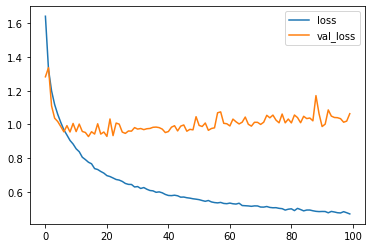

In [ ]:
df[['loss','val_loss']].plot()

#Evalating The Model

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0636 - accuracy: 0.6851


[1.0636101961135864, 0.6851000189781189]

In [ ]:
predictions=np.argmax(model.predict(x_test),1)

313/313 [==============================] - 1s 2ms/step


#Classification Report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.82      0.82      0.82      1000
           2       0.58      0.54      0.56      1000
           3       0.55      0.39      0.46      1000
           4       0.60      0.65      0.62      1000
           5       0.59      0.58      0.59      1000
           6       0.72      0.79      0.76      1000
           7       0.75      0.71      0.73      1000
           8       0.76      0.81      0.78      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [ ]:
# Making the Predictions
pred = model.predict(x_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[5.00254100e-05 4.25239305e-05 1.01409818e-03 ... 7.13053450e-04
  4.59160772e-04 2.18217354e-03]
 [5.29848374e-02 8.76293331e-02 7.36554082e-11 ... 7.10691401e-16
  8.59385669e-01 1.76761347e-07]
 [2.84802751e-03 1.36031844e-02 2.11851052e-08 ... 7.29323157e-10
  9.83531833e-01 1.69242212e-05]
 ...
 [5.43224196e-05 2.45443225e-05 1.10869436e-02 ... 1.49240007e-03
  1.69117684e-05 1.44467427e-04]
 [9.16158594e-03 8.37258697e-01 2.11939891e-03 ... 6.68689566e-08
  1.76170448e-04 3.58969628e-05]
 [8.68915634e-11 1.18767325e-07 4.04190899e-07 ... 9.99998808e-01
  2.35449986e-14 3.51131781e-08]]
[3 8 8 ... 5 1 7]


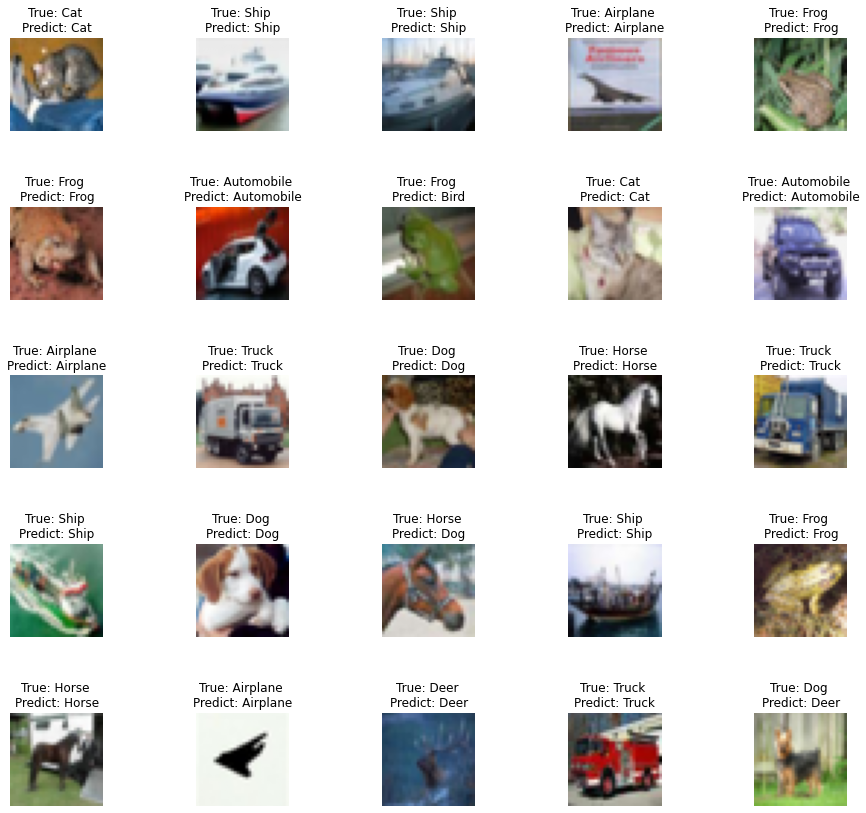

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (names[np.argmax(y_cat_test[i])], names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#Question 2

#Write IOB scheme for the given words
#{“Sundar Pichai”,“Google Inc.”, “California” }
#Text Tokens: Sundar Pichai , the CEO of Google Inc . is walking in the streets of California .

#Text Token

In [ ]:
text_token = 'Sundar Pichai , the CEO of Google Inc. is walking in the streets of California.'

#Importing The NLTK Library

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

#Removing Punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
 text_2 = remove_punctuation(text_token)
 print(text_2)

Sundar Pichai  the CEO of Google Inc is walking in the streets of California


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized_word = word_tokenize(text_2)
print(tokenized_word)

['Sundar', 'Pichai', 'the', 'CEO', 'of', 'Google', 'Inc', 'is', 'walking', 'in', 'the', 'streets', 'of', 'California']


In [ ]:
nltk.download('averaged_perceptron_tagger')  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#Part-Of-Speech Tagging

In [ ]:
pos_tags_text = pos_tag(tokenized_word)
print(pos_tags_text)

[('Sundar', 'NNP'), ('Pichai', 'NNP'), ('the', 'DT'), ('CEO', 'NNP'), ('of', 'IN'), ('Google', 'NNP'), ('Inc', 'NNP'), ('is', 'VBZ'), ('walking', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('streets', 'NNS'), ('of', 'IN'), ('California', 'NNP')]


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')  

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#Named Entity Recognition

In [ ]:
ne_tree = nltk.ne_chunk(pos_tags_text)
print(ne_tree)

(S
  (PERSON Sundar/NNP)
  Pichai/NNP
  the/DT
  (ORGANIZATION CEO/NNP)
  of/IN
  (ORGANIZATION Google/NNP Inc/NNP)
  is/VBZ
  walking/VBG
  in/IN
  the/DT
  streets/NNS
  of/IN
  (GPE California/NNP))


In [ ]:
from nltk.chunk import tree2conlltags

#IOB Scheme

In [ ]:
iob_ = tree2conlltags(ne_tree)
print(iob_)

[('Sundar', 'NNP', 'B-PERSON'), ('Pichai', 'NNP', 'O'), ('the', 'DT', 'O'), ('CEO', 'NNP', 'B-ORGANIZATION'), ('of', 'IN', 'O'), ('Google', 'NNP', 'B-ORGANIZATION'), ('Inc', 'NNP', 'I-ORGANIZATION'), ('is', 'VBZ', 'O'), ('walking', 'VBG', 'O'), ('in', 'IN', 'O'), ('the', 'DT', 'O'), ('streets', 'NNS', 'O'), ('of', 'IN', 'O'), ('California', 'NNP', 'B-GPE')]
